## Imports

In [9]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import tqdm

## Load secondary structures

In [10]:
arr=[]
for potential in ['no_potential','nc_potential','dmasif_potential','nc_dmasif_potential']:
    for file in os.listdir(f'dssp_statistics_p0/{potential}'):
        d={'H':0,'S':0,'T':0,'G':0,'B':0,'I':0,'E':0,' ':0}
        with open(f'dssp_statistics_p0/{potential}/{file}') as f:
            for s in f:
                if s[-1]=='.':
                    continue
                if s[11]!='A':
                    continue
                d[s[16]]+=1
        arr.append([file.split('.')[0],'_'.join(file.split('_')[:-1]),potential]+[d.get(x,0) for x in 'HSTGBIE '])

sec_df=pd.DataFrame(columns=['name','protein','potential','alpha\nhelix','bend',
                             'turn','3-10\nhelix','beta\nbridge','pi\nhelix','beta\nsheet','other'], 
                    data=arr)
sec_df

,name,protein,potential,alpha\nhelix,bend,turn,3-10\nhelix,beta\nbridge,pi\nhelix,beta\nsheet,other
0,ih_64,ih,no_potential,92,1,2,0,0,0,0,5
1,pd_l1_99,pd_l1,no_potential,66,3,1,0,0,0,0,4
2,il_7ra_114,il_7ra,no_potential,88,1,0,0,0,0,0,3
3,pd_l1_96,pd_l1,no_potential,80,2,0,0,0,0,0,7
4,insr_123,insr,no_potential,78,1,1,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
3995,trka_104,trka,nc_dmasif_potential,25,4,9,3,1,0,0,35
3996,pd_l1_41,pd_l1,nc_dmasif_potential,9,7,12,0,5,0,0,38
3997,ih_69,ih,nc_dmasif_potential,73,1,0,0,0,0,0,2
3998,insr_112,insr,nc_dmasif_potential,34,6,2,0,8,0,0,34


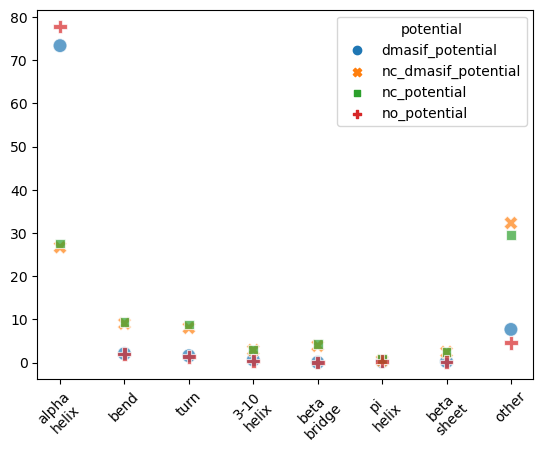

In [11]:

sns.scatterplot(sec_df.groupby('potential').mean().T, s=100, alpha=.7)
plt.xticks(rotation=45) 
plt.show()



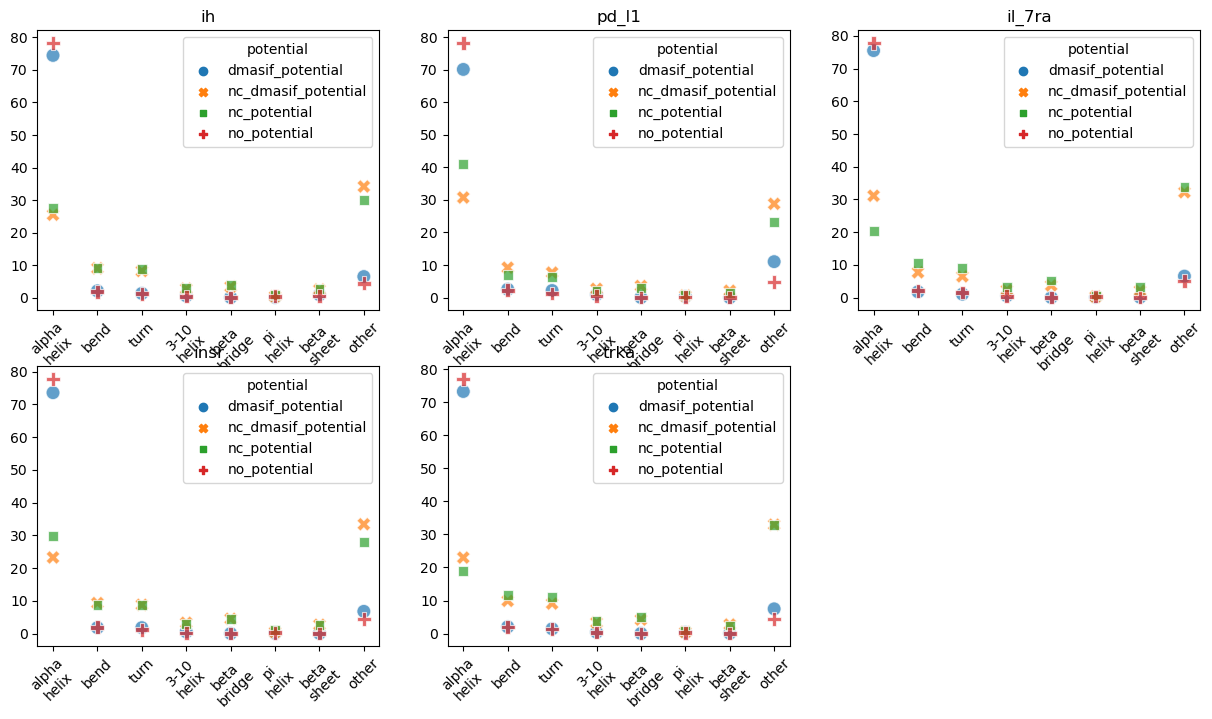

In [12]:
plt.figure(figsize=(15,8))
for i, prot in enumerate(sec_df.protein.unique()):
    plt.subplot(2,3,i+1)
    plt.title(prot)
    sns.scatterplot(sec_df[sec_df.protein==prot].groupby('potential').mean().T, s=100, alpha=.7)
    plt.xticks(rotation=45) 

## Load sequences

In [4]:
arr=[]
for potential in ['no_potential','nc_potential','dmasif_potential','nc_dmasif_potential']:
    for record in SeqIO.parse(f"ligandmpnn_output/{potential}/all_seqs.fasta", "fasta"):
        arr.append([record.id, record.seq, potential])
    
seq_df=pd.DataFrame(columns=['name','seq','potential'], data=arr)
seq_df['protein']=seq_df.name.apply(lambda x: '_'.join(x.split('_')[:-2]))
seq_df['seq']=seq_df.seq.apply(lambda x: x.split(':')[0])
seq_df['length']=seq_df.seq.apply(lambda x: len(x))

seq_df

FileNotFoundError: [Errno 2] No such file or directory: 'ligandmpnn_output/dmasif_potential/all_seqs.fasta'

In [3]:
alphabet='GAVLIPFYHRKDNEQSTCMW'
for a in alphabet:
    seq_df[a]=seq_df.seq.apply(lambda x: x.count(a))

NameError: name 'seq_df' is not defined

In [ ]:
sns.scatterplot(seq_df.groupby('potential').mean().iloc[:,1:].T, s=100, alpha=.7)

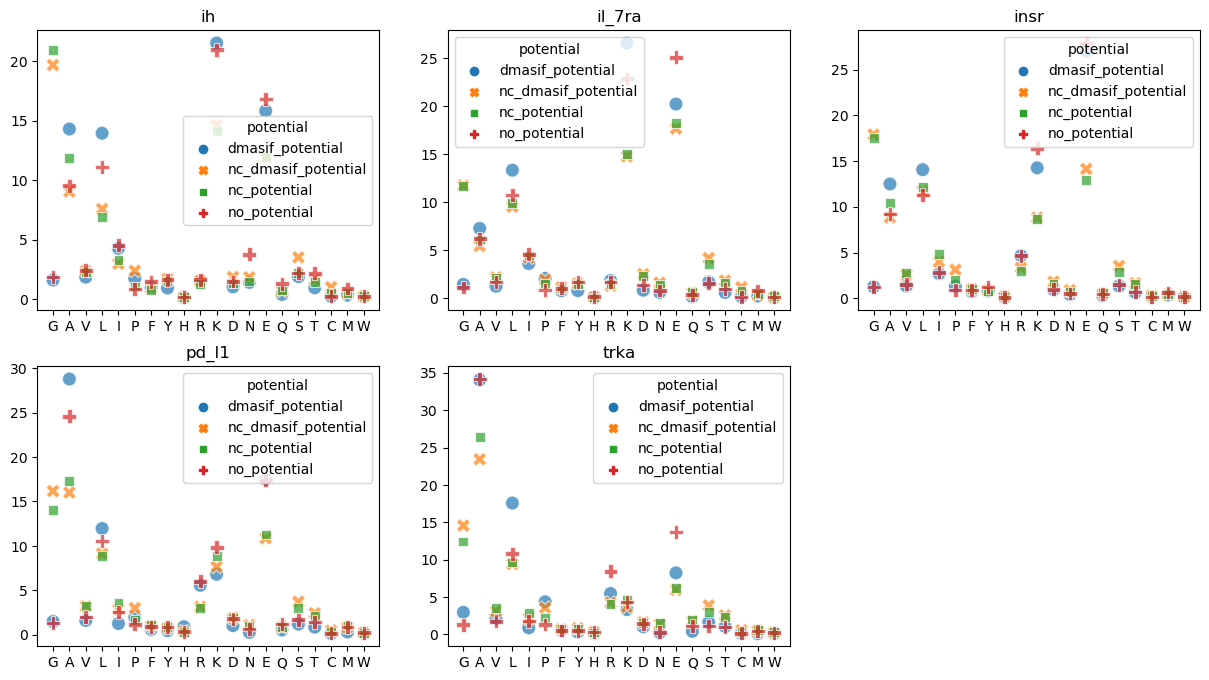

In [8]:

plt.figure(figsize=(15,8))
for i, prot in enumerate(seq_df.protein.unique()):
    plt.subplot(2,3,i+1)
    plt.title(prot)
    sns.scatterplot(seq_df[seq_df.protein==prot].groupby('potential').mean().iloc[:,1:].T, s=100, alpha=.7)